# Task 2 : SALES PREDICTION

## Importing libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
advertise = pd.read_csv('advertising.csv')

## Exploratory Data Analysis

In [3]:
advertise.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
advertise.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
advertise.shape

(200, 4)

In [6]:
advertise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
advertise.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
advertise.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Axes: >

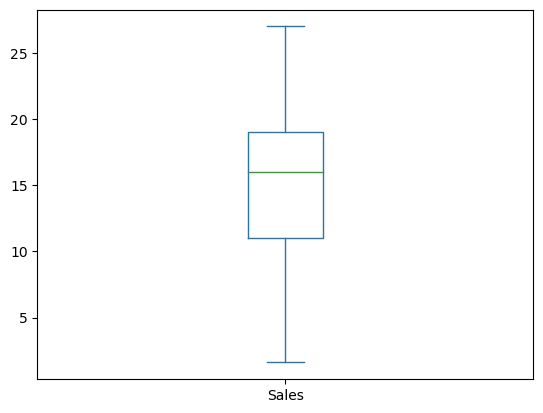

In [9]:
advertise['Sales'].plot(kind='box')

# Data Analysis And Visualization

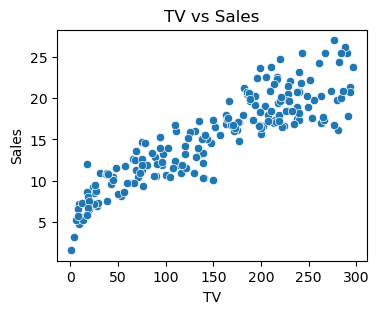

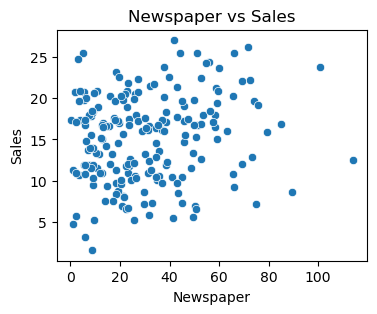

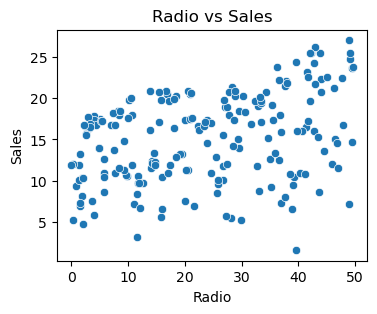

In [10]:
plot_height = 3

# Scatter plot for TV vs Sales
plt.figure(figsize=(4, plot_height))  
sns.scatterplot(data=advertise, x='TV', y='Sales')
plt.title('TV vs Sales')
plt.show()

# Scatter plot for Newspaper vs Sales
plt.figure(figsize=(4, plot_height))
sns.scatterplot(data=advertise, x='Newspaper', y='Sales')
plt.title('Newspaper vs Sales')
plt.show()

# Scatter plot for Radio vs Sales
plt.figure(figsize=(4, plot_height))
sns.scatterplot(data=advertise, x='Radio', y='Sales')
plt.title('Radio vs Sales')
plt.show()


# Correlation of Columns

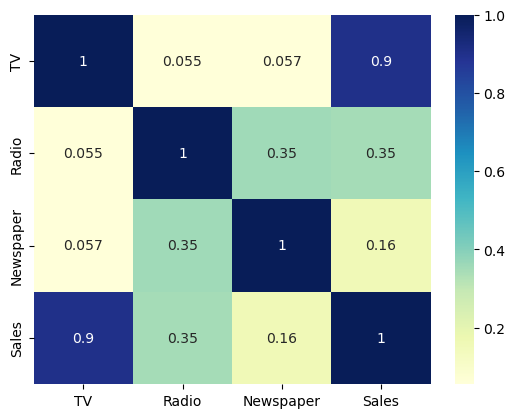

In [11]:
sns.heatmap(advertise.corr(), cmap="YlGnBu", annot = True)
plt.show()

# Model Building Using statsmodels

In [12]:
X = advertise['TV']
y = advertise['Sales']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [14]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [15]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

# Linear Model

In [16]:
import statsmodels.api as stm

In [17]:
X_train_stm = stm.add_constant(X_train)
lr = stm.OLS(y_train, X_train_stm).fit()

In [18]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [19]:
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 09 Sep 2023   Prob (F-statistic):           1.52e-52
Time:                        14:32:04   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

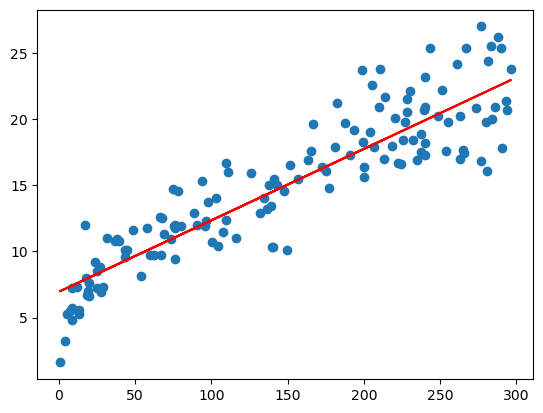

In [20]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

# Model Evaluation

In [21]:
y_train_pred = lr.predict(X_train_stm)
res = (y_train - y_train_pred)

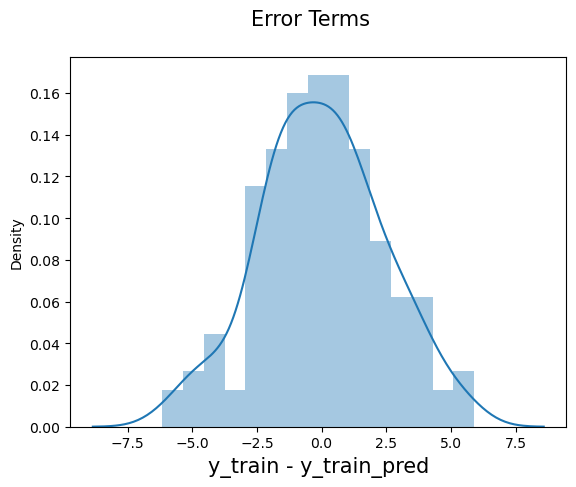

In [22]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

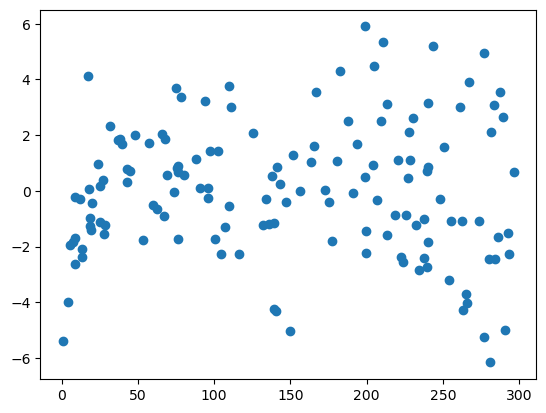

In [23]:
plt.scatter(X_train,res)
plt.show()

# Prediction Check

In [24]:
X_test_stm = stm.add_constant(X_test)
y_pred = lr.predict(X_test_stm)

In [25]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [27]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.0192960089662324

In [28]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7921031601245658

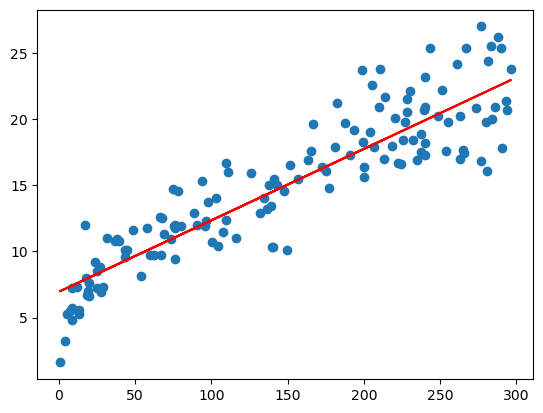

In [29]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

# Task 2 Completed